# Modeling Ordinary Differential equations (ODEs)

This tutorial is a meant to help you learn some basics about ordinary differential equations (ODE) and numerical algorithms to solve them. This can be viewed as a simple way to "model" a physical system, i.e. represent reality by a physical and then mathematical abstraction, and explore that construct with analytical or numerical methods. We will typically want to solve for some property, say location, that changes with another parameter, say time. Think of an object being thrown and we wish to predict its trajectory from the initial velocity, for example.<br>

At the end of the toturial, you will have developed your own functions for different ways of solving such equations, using the Euler, Midpoint, and 4th-order Runge-Kutta methods. Those are different numerical approaches for what is, analytically, a single equation. These methods will be used later in the course and perhaps even for your own future research. We explore different solutions approaches to illustrate how a solution might be unique mathematically, it can be approximated in different ways numerically. There will always be trade offs, such as how accurate we want the solution to be, and how computationally expensive it is to get there. 
<br>

This is not a numerical modeling class, and we mainly focus on what can be learned about the physics from actual and numerical experiments. However, some background is useful. If you are interested in more details, please refer to these lecture notes, for example, __[Numerical Geodynamics: Finite Difference and Finite Element solutions to solid Earth dynamics problems](https://www-udc.ig.utexas.edu/external/becker/Geodynamics557.pdf)__ This is optional reading.

### **Homework Instructions**

This document can both serve as a reference, and as a worksheet for your exercises.

1. **Fill in the Code Cells**: Complete all code cells where instructions/tasks are provided. Ensure that your code runs correctly without errors. In places, you will be expected to add more material, such as additional plots you made for analysis. 

2. **Answer Guiding Questions**: Use the provided markdown cells to answer all guiding questions clearly and concisely. These will help demonstrate your understanding of the material.

3. **Run All Cells**: Before submitting, run all cells in the notebook to confirm that your code is functioning as expected and there are no errors.

4. **Save as PDF**: After completing the notebook, save it as a notebook and a PDF file.

5. **Upload to Canvas**: Submit the PDF file *and* the notebook on Canvas. Please try to keep all analysis within the notebook, but if too complicated, it is also OK to hand in a supplementary Word gneerated PDF or similar. 

# The definition and example of ODEs

Ordinary differential equation (ODE): an equation that involves the derivative of the function we want to solve for, and that has only one independent variable (otherwise it's a partial differential equation, i.e., PDE).<br>

For example, $\frac{dy}{dx} = f(x)$ can be solved by integration over $x$, such that $y=\int f(x)dx + C$.<br>

where $C$ can be determined by additional information, such as a boundary condition on $y$.

The $x$ here will often be time - we worry about how some quantity $y$, say, temperature, evolves over time, on average, say for a fluid in a box, rather than the spatial details of how heat is being transported, e.g. by convection. To treat such details, one has to consider spatial and temporal variations, which lead to PDEs which combine *partial* derivatives with respect to space and time. We will return to that problem later in the course. 

### The order of an ODE
The order of an ODE is determined by the largest number of derivatives involved, e.g. 

$\frac{d^2y}{dx^2} + q(x)\frac{dy}{dx} = r(x)$ 

is "second order" because there is a second derivative of $y$, $\frac{d^2\,y}{d\,x^2}$ or sometimes written as $y''$ or $\ddot{y}$ if the derivative is with respect to time. We will see how we can reduce higher than first order ODEs to first order ODEs by introducting helper variables like $z=y'$, such that an equation for the evolution of $y''$ becomes one for the evolution of $z'$. 

### Example 1: A ballistic trajectory 

#### Evel Kneevel in a vaccuum

Let's assume we do want to explore how an object will move once it has been shot in the air, or once Evil Kneevel rides his motorbike off a ramp to attempt a jump. After taking off, at every given time, $t$, the location of the object, like Evil and his bike, is given by $x(t)$ (where $x$ could also be a vector, in 3-D, for example). How the location changes is given by the time derivative of the location,

$
\frac{d x(t)}{dt} = v(t)
$

where $v$ is the velocity, or $v=\dot{x}$. If we know $x$ at time $t=t_0$ and we know $v$, then we can get the next location by solving the ODE for $x$. 

The basic motion of an object is fundamentally governed by Newton's law for inertia, which says that the inertial force is $F_i=ma$, being balanced by the gravitational pull on the object, the gravity force $F_g=-mg$, which works only in the vertical direction. If instead of considering scalars, we allow for vectors, e.g. in 2-D, $x$ and $y$ directions, and denote vectors with bold font, ${\bf x}=\{x,y\}$, and have $x$ go horizontal and $y$ vertical, the force balance can be written as

$${\bf F}_i = m {\bf a} = -m g {\bf e}_z={\bf F}_g$$

where ${\bf e}_z=\{0,1\}$ is the unity vector in the vertical, since ${\bf g}=\{0,g\}$. That is, the amplitude of ${\bf g}$, $|{\bf g}|=\sqrt{g_x^2 + g_y^2} = g$, and this equation is actually two equations, for $x$ and $y$ like so 

\begin{align}
 m \dot{v}_x & = & 0\\
m \dot{v}_y & =& - m g.
\end{align}

If we start at the initial location ${\bf x}^0 = (0,0)$ at the origin of the coordinate system and an initial Evil velocity of ${\bf v}^0=\{v_x^0,v_y^0\}=s\{\sin\theta,\cos\theta\}$ where $s$ is the original velocity amplitude (speed!) and $\theta$ the angle at which Evil is taking off, that is the angle of the ramp. 

Without any further complications such as due to drag, this equation has an analytical solution. The trajectory for ${\bf x}(t)$ starting from ${\bf x}^0$ at $t=0$ that solves these equations is given by 

\begin{align}
x(t) & = & v_x^0 t\\
y(t) & = & v_y^0 t - g\frac{t^2}{2}
\end{align}

where the $y(t)$ has a parabola shape, and those equations follow from integrating the governing force balance equations. 


<img width=300 src=https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExMnRicHVxaGxraXU3dmh3YXQwemc2YzJsNWlseWlxcTVtY2U5eWJzayZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/SkWI0ahxPyAOk/giphy.gif>

Why don't we plot that solution!

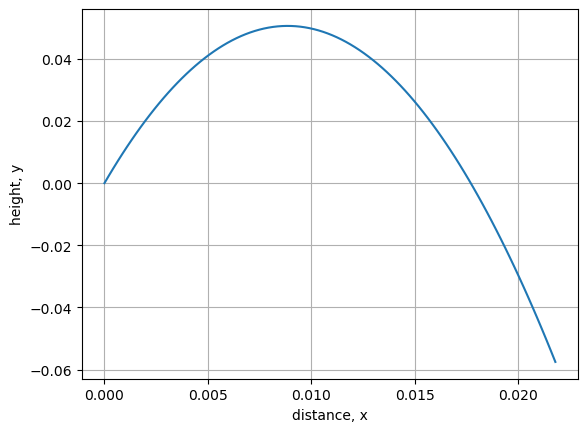

In [30]:
import numpy as np
import matplotlib.pyplot as plt
t=np.linspace(0,.25,100)
g=9.81

plt.plot(vx0*t,vy0*t-g*(t**2)/2);plt.xlabel('distance, x');plt.ylabel('height, y');plt.grid(True);plt.show()

Clearly, we want to be more careful, if $y=0$ is the ground, for example, that the solution does not move into $y<0$ territory, but overall, this seems to make sense. 

The plot, as shown, is incomplete, since it is missing units. Play around with different initial angles and velocities and comment some more on these results. This means: make different plots and change parameters to explore behavior. Plug in numbers like what you might expect for the speed of Evil's motorbike (making sure to convert mph or km/h to m/s in the SI system), and see how far he might theoretically be able to jump. What is the optimal takeoff angle to maximize distance jumped at constant velocity, and why?

#### Numerical solution with drag

Things get more interesting if we also consider the effect of wind drag, and we will use this as one example for why we might want to solve things numerically is analytical solutions are either not available or too complicated to derive. 

Wind drag can be assumed to be proportional to the velocity squared, which with a mass-scaling drag factor $c$ can be written as $F_d \sim -cm v^2$. Or, using vectors we can write as ${\bf F}_d = -cm|{\bf v}| {\bf v}$ where $|{\bf v}|=\sqrt{v_x^2+v_y^2}$ is again the amplitude of the vector and we multiply $cm|{\bf v}|$ with $-{\bf v}$ to make sure that the direction of the drag force is opposite the motion.

We now have to add the drag to the original force balance to get a new equation for $F_i=F_g+F_d$, or 

$
m{\bf a} = - m g {\bf e}_y - m c |{\bf v}| {\bf v},
$

which is now harder to solve analytically. However, given that acceleration, ${\bf a}$, is the time derivative of velocity, ${\bf a} = \dot{{\bf v}} = \frac{d{\bf v}}{dt}$, and velocity is the time derivative of location ${\bf x}$, ${\bf v}=\dot{{\bf x}}$, we can write down a set of equations

$
\left( \dot{{\bf x}}\atop \dot{{\bf v}}\right)
=
\left(
{\bf v}\atop
-g{\bf e}_y - c |{\bf v}|{\bf v}
\right),
$

where the second row is our force balance, divided by mass $m$ which cancels out. Now, we have a set of first order ODEs to solve, for the temporal evolution of ${\bf x}$ and ${\bf v}$ (where ${\bf v}$ happens to be the time-derivative of ${\bf x}$, but another quantity could also evolve over time). Moreover, both equations hold for the vector evolution, so may consist of 3-D, but here only 2-D, equations for each coordinate, like so, spelling out all components, 
\begin{align}
\dot{x} &=& v_x\\
\dot{y} &=& v_y\\
\dot{v}_x & = & -c|{\bf v}| v_x\\
\dot{v}_y & = & -g -c|{\bf v}| v_y.\\
\end{align}

These are now four, coupled ODEs, which we shall solve numerical in the next class. We can think of these as being for the solution of the evolution of a vector ${\bf z}=\{x,y,v_x,v_y\}$ such that

$
\frac{d{\bf z}}{dt} = {\bf f}({\bf z})\quad (*)
$ 

where ${\bf f}$ has four dimensions and provides the time derivative for each of the components of ${\bf z}$. Any numerical method to solve ODEs is set up to handle equations like (*).

### Example 2: The Harmonic Oscillator

You derived in class that Hooke's law says that the elastic restoring force is $F_e = -k x$ where $x$ is the displacement, and $k$ the spring constant. If we consider inertia, $F_i = m a = m \ddot{x}$, and equal the two, 

$
m \ddot{x} + k x=0
$ 

is another example of an ODE, as written it is second order. As above, we can use $v=\dot{x}$ and then capture the evolution of $v$ as a first order ODE, and this set of equations also has a relatively simple, *harmonic* solution

$
x(t) = A \cos(\omega t + \phi)\quad\mathrm{with}\quad \omega=\sqrt{\frac{k}{m}}
$

where $\omega=2\pi f$ is the angular frequency, $f$ frequency (period $T=\frac{1}{f}$), and $\phi$ the phase. The derivation of that solution is not hard (we can start by guessing that a harmonic might solve things). 
These figures illustrate how the motion of the weight is like seeing a wave (the $\cos$) travel by.
<br>
<img width=100 src=https://upload.wikimedia.org/wikipedia/commons/d/d5/Animated-mass-spring-faster.gif>
<img width=300 src=https://upload.wikimedia.org/wikipedia/commons/7/74/Simple_harmonic_motion_animation.gif>
<br>

However, here, we are mainly focusing on numerical solutions. For that, it is required to analytically reduce the complexity of the ODEs. We have done this implicitly above, but will talk about this more formally now. 

# Reduce ODEs to sets of first order equations
We can always reduce ODEs to sets of first order equations. For example, the equation for the harmonic oscillator can more generally be written as 

$\frac{d^2y}{dx^2} + q(x)\frac{dy}{dx} = r(x)$

which can be rewritten as <br>

$\frac{dy}{dx} = z(x)$ <br>

$\frac{dz}{dx} = r(x) - q(x)z(x)$ 

so that we have a first order ODE for $z$. 

In general, we can write     $\frac{dy_i(x)}{dx}  = f_i(x,y,...,y_N)$ <br>
for a system of $N$ coupled ODEs, all dependent on the independent variable $x$, which is typically time, $t$. <br>

In vector form for $x=t$,

$\frac{d\mathbf{y}}{dt} = \mathbf{f}(t,\mathbf{y})$, 

a generalization of (*), making the arguments of time $x$ and everything else, ${\bf y}$, more explicit.

The actual solutions of ODEs will depend on the types of boundary conditions on $\mathbf{y}$ and the initial conditions.

# Initial value problems
In initial value problems, $\mathbf{y}$ is known for some $t = t_0$, and the system evolves from there 
to $t_f$ some finite time later.

Over the course, you will encounter physical systems governed by different sets of ODEs such as the harmonic oscillator, the double pendulum, two state-variable rate- and state- friction, Lorenz equations as a simplified description of thermal convection in the atmosphere, etc.  

Recall that $\frac{dy}{dt} = f(t)$ can be solved by integration $y=\int f(t)dt + C$.<br>

If we solve the system from $t=t_0$ to $t=t_f$ with initial conditions $y_0=y(t=t_0)$, we get <br>
$y(t)=y_0 + \int_{t_0}^{t_f} f(t,y(t)) dt$.

We can break down the integral into $step$ $sizes$ $h$ from $t_i$ to $t_i+h$ with $n=\frac{t_f-t_0}{h}$ partial integrals such that we only need to solve <br>
$I = \int_{t_i}^{t_i+h} f(t,y(t)) dt$ <br>
as cheaply as possible numerically.

Examples 1 and 2 from above are this type of problem, and the trajectory example makes it pretty clear why these approaches are also called *shooting methods*: We know the initial location, $x_0$, and can get the new location at time $t=t_0+h$ by advancing $x(t=t_0+h) = x_0 + \frac{dx}{dt} h + \ldots$.


# Numerical solution of ODEs
Now we will introduce three numerical approximations to the partial integral $I$ to highlight some general issues with numerical methods. 

## Warm-up - basics on functions
Before we hop onto solving ODEs, let's introduce some basics on creating functions and passing variables/lists/vectors/functions in Python. <br>

In the following cell, we will create a function called evaluate_function, which takes in three inputs - a variable, a list and a vector, makes modifications to them and calls a function "calcSin", and return the modified items.  

In [31]:
import numpy as np # load Python package numpy. We will use its functions to create arrays, calculate sine and assign Pi.

# We create var, list, vec and func.
var0  = 1. * np.pi                  # a variable, Pi.
list0 = ["Apple", "Banana", 5]      # a list that contains three elements, two strings and a number.
vec0  = np.array([[1, 2], [3, 4]])  # a two dimensional numpy array for the vector. You may also use a list for simply cases. 

# define a function "calcSin" that calculate the sine of the input. 
def calcSin(var):      # the sytax is "def function_name(input1, input2, ...):". Don't forget ":".
    res = np.sin(var)  # We need an indentation here and in the following lines. 
    return res

print('Before modifications ...')
print('var0  is   ', var0)
print('list0 is   ', list0)
print('vec0  is   ', vec0)
print('calcSin(var0) is', calcSin(var0))


def evaluate_function(var, list,function): # this function has a function as its argument!
    res1   = var**2
    res2   = function(var) # If we define the functions we will use beforehand, we can call them, like calcSin, in this function.
    list[1] = "cake"
    return res1,res2

[res1a, res2a] = evaluate_function(var0,list0,np.sin)
[res1b, res2b] = evaluate_function(var0,list0,np.cos)


print('After modifications ...')
print('list is', list)
print('res1 is   ', res1a,res2a)
print('res2 is   ', res1b,res2b)
    

Before modifications ...
var0  is    3.141592653589793
list0 is    ['Apple', 'Banana', 5]
vec0  is    [[1 2]
 [3 4]]
calcSin(var0) is 1.2246467991473532e-16
After modifications ...
list is <class 'list'>
res1 is    9.869604401089358 1.2246467991473532e-16
res2 is    9.869604401089358 -1.0


# The Euler method
The simpliest numerical approximation to $I$ is 

$I = f(t_i, y(t_i)) \cdot h$ 

such that 

$y(t_i+h) = y(t_i) + h \cdot f(t_i,y(t_i))$. <br> 



If you do Taylor expansion to approximate the function $y(t)$ around $t_0$, you get in general
$y(t) \approx y(t_0) + (t-t_0) \cdot \frac{dy(t_0)}{dt} + \frac{(t-t_0)^2}{2!} \cdot \frac{d^2y(t_0)}{dt^2} + \frac{(t-t_0)^3}{3!} \cdot y''' + ...$. <br>

For our problem, we obtain <br>
$y(t_i+h) \approx y(t_i) + h \cdot f(t_i,y(t_i)) + \frac{h^2}{2} \cdot \frac{df}{dt} + ...$ <br>
which shows that the Euler method takes the first term of this expansion only. Therefore, everything else is missing. This means that 
the error of the Euler scheme goes as $O$("order of")($h^2$), and the scheme is therefore, by definition, only accurate to $first$ $order$. It means that tiny time steps would have to be taken for a good solution. 





In [32]:
# Exercise - Could you fill in the missing code part to finish the Euler method function?


# Define the function f(x), which takes in vector x at the current time - let's make this simple, and have the derivative only 
# depend on time, t, such that dx/dt(x,t) = t, and then f(t)=1/2 t^2 +C
def fmine(t, x):
    return t

# Define the Euler function 
def euler(t, y, f, neq, h):
    # The function will take in y at the current time and update and return the y one step size h further according to function fx.
    # neq: number of equations in the reduced order ODE system. In this case, neq == 1.
    yout=np.zeros(neq)
    for i in range(neq):            # Loop over all the equations in the system.
        # NOTE: in python, index starts from 0. Therefore, for neq==1, i will start from 0. 
        # In this case, there is only i==0 in the loop. 
        # If you want to check value in i, try print it out and uncomment the following line:
        # print(i)
        yout[i] = y[i] + h * f[i](t,y) 
        # Please fill out the above missing parts ?? to make this function work!
    return yout

In [33]:
# This exercise will update x from x=3 at t=2 and return x at t=2+h. 
#  according to the function form f(x)=x*x based on the Euler method.
neq = 1
h   = 0.05
t   = 2.     # Note that this is a number
y   = [3.]   # Note that this is a list. For what is a List in python, here is some description https://www.w3schools.com/python/python_lists.asp.
f   = [fmine]   # If your system contains mulitple equations, we put them all in list f. 
res = euler(t, y,f, neq, h)

print(res)

[3.1]


That is not very helpful on its own, is it? So let us plot the output and make this a bit more intuitive.

nsteps, dt 51 0.06


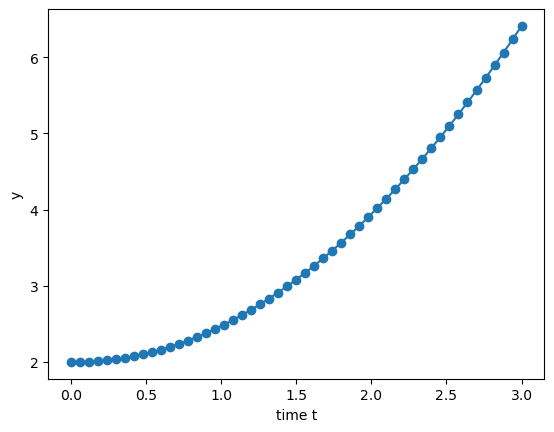

In [34]:
import matplotlib.pyplot as plt

# how many equal timesteps to take?
nsteps=51
# we only have one dimension
ndim=1
# this is where we want to end up in the end
tmax=3
# determine the time stepping from the number of steps (note the -1)
dt=tmax/(nsteps-1)
# some output
print('nsteps, dt',nsteps,dt)

tstore=np.zeros(nsteps)
ystore=np.zeros([nsteps,ndim])

t0=0
yinit=2

i=0 # init the lop
y=[yinit] # initial value, use a list
t=t0 # we start at t_0 

while(i < nsteps):
    tstore[i]=t
    ystore[i,:]=y[:]
    y = euler(t,y,[fmine],ndim,dt)
    t = t+dt
    i=i+1
    
    
plt.plot(tstore,ystore[:,0],'o-')
plt.ylabel('y')
plt.xlabel('time t')
plt.show()



# Analyze the results

* What does the numerical method show you? What sort of function seems to be traced out?
* What solution would you expect? Can you figure out the analytical answer (i.e. what should the solution look like, mathematically)?
* Is the numerical solution accurate? How would you tell?
* Besides comparing the solutions, what other properties might you plot to see how good the solution is?



# The Midpoint method
There are a few improvments to the Euler scheme such as the Midpoint method. <br>

It first evaluates the derivative of $y$ w.r.t to $t$ at half the Euler step and then advances $y$ by the new slope.

$y(t_i+h) = y(t_i) + h \cdot f(t_i + \frac{h}{2}, y(t_i) + f(t_i,y_i)\frac{h}{2})$. <br>

Letting $y_{i+1} = y(t_i +h)$ and $y_i = y(t_i)$, we can follow the numerical implementation recipe <br>
$k_1 = h \cdot f(t_i, y_i)$ <br>
$k_2 = h \cdot f(t_i+h/2, y_i+k_1/2)$ <br>
$y_{i+1} = y_i + k_2 + O(h^3)$ <br>

You can see the method is $second$ $order$ $accurate$. Note that higher accuracy has come at a cost, $f$ now needs to be evaluated twice and once at a $y$ value different from $y_i$, and there are overall more operations per time step. However, since the error is now $O(h^3)$, we can take larger time steps.

In [6]:
# Exercise - Could you fill in the missing code part to finish the Midpoint method function?

# Let's reuse the function fx defined above. Recall that if we define a function beforehand, we can use them in later functions.

# Define the Midpoint function.
def midpoint(t, y, f, neq, h):
    # The function will take in y at the current time and update and return the y one step size h further according to function fx.

    k1 = np.zeros(neq) 
    k2 = np.zeros(neq)
    yout = np.zeros(neq)
    
    for i in range(neq):            # Loop over all the equations in the system.
        k1[i] = f[i](t,y)*h     
    for i in range(neq):   
        k2[i] = f[i](t+h/2,y+k1/2)*h
    yout=y+k2
    
    return yout

In [7]:
# lets compare the step updates

y=[yinit]
res1 = euler(t0, y, f, neq, h)
res2 = midpoint(t0, y, f, neq, h)

print(res1,res2)

[2.] [2.00125]


Hmm, OK, but what does that look like graphically, how do those methods compare?

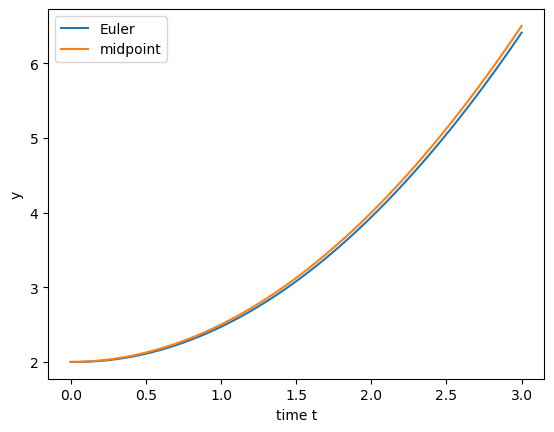

In [36]:
nmethod=2
# make more room in ystore
ystore=np.zeros([nsteps,ndim,nmethod])

i=0
yinit=2
# now we have two solutions
ye=[yinit] # initial value, use a list
ym=[yinit]
t=0

while(i < nsteps):
    tstore[i]=t
    ystore[i,:,0]=ye[:]
    ystore[i,:,1]=ym[:]
    ye = euler(t,ye,[fmine],ndim,dt)
    ym = midpoint(t,ym,[fmine],ndim,dt)
    t = t+dt
    i=i+1
    
plt.plot(tstore,ystore[:,:,0],tstore,ystore[:,:,1])
plt.legend(['Euler', 'midpoint'])
plt.ylabel('y')
plt.xlabel('time t')
#plt.ylim([0,40])
plt.show()


Well, which one is better? Which one is correct? 

Consider that our function's analytical solution can be found by means of integrating 

$\frac{dy}{dx} = x$ 

which is 

$y=\frac{1}{2} x^2+c$.

Let's compare the analytical solution with the two numerical attempts.

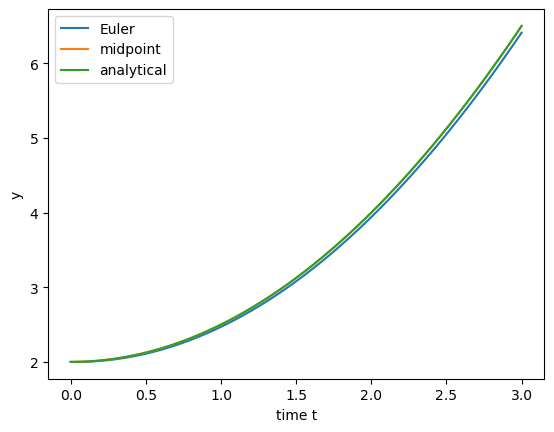

In [37]:
ya = yinit+0.5*tstore**2
plt.plot(tstore,ystore[:,0,0],tstore,ystore[:,0,1],tstore,ya)
plt.legend(['Euler', 'midpoint','analytical'])
plt.ylabel('y')
plt.xlabel('time t')
plt.show()


Therefore, even for this simple problem, midpoint is better than Euler. Why is the Euler method generally not a good idea (think of the shape of $y$ / recall from lecture)?


# 4th order Runge-Kutta method

You may now wonder how one could improve on the mid point method, and it comes down to a tradeoff between the number of function evolutions and striving for higher polynomial approximations. After a trade-off consideration, at least for smooth function, the *4th order Runge-Kutta method* generally works well. It is 4th order accurate and the recipe is 
<br>
$k_1=h \cdot f(t_i,y_i)$ <br>
$k_2=h \cdot f(t_i+\frac{h}{2}, y_i+\frac{k_1}{2})$ <br>
$k_3=h \cdot f(t_i+\frac{h}{2}, y_i+\frac{k_2}{2})$ <br>
$k_4=h \cdot f(t_i+h, y_i + k_3) $  <br>
$y_{i+1} = y_i + \frac{k_1}{6} + \frac{k_2}{3} + \frac{k_3}{3} + \frac{k_4}{6} + O(h^5)$ <br>

(For more details, adaptive step size Runge Kutta and relevant resources, please check out the Numerical Geodynamics lecture notes and reference therein. )

In [10]:
# Exercise - implement the 4th order Runge-Kutta method.


# Define the 4th order Runge-Kutta function.
def rk4(t, y, f, neq, h):
    # The function will take in x at the current time and update and return the x one step size h further according to function fx.
    k1 = np.zeros(neq) 
    k2 = np.zeros(neq)
    k3 = np.zeros(neq)
    k4 = np.zeros(neq)
    for i in range(neq):   # Loop over all the equations in the system.
        k1[i]=f[i](t    , y   )*h 
    for i in range(neq): 
        k2[i]=f[i](t+h/2, y+k1/2)*h
    for i in range(neq): 
        k3[i]=f[i](t+h/2, y+k2/2)*h
    for i in range(neq): 
        k4[i]=f[i](t+h  , y+k3)*h
   
    yout = y + (k1 + 2*k2 + 2*k3 + k4)/6
    return yout

In [38]:
y = [yinit]
res1 = euler(t0, y, f, neq, h)
res2 = midpoint(t0, y, f, neq, h)
res3 = rk4(t0,y,f,neq,h)
print(res1,res2,res3)


[2.] [2.00125] [2.00125]


So this seems to work. But now, let's try something a little more interesting to integrate. 

Let's use the function 

$\frac{y(t,y)}{dt} = y \sin(t)^2$. 

This turns out (if in doubt, use __[Wolfram Alpha](https://www.wolframalpha.com/input?i=Solve%5BD%5By%2Ct%5D+%3D+Sin%5Bt%5D**2+y%5D)__ ) to have the solution 

$y(t) = c \exp(\frac{1}{2}(t -\sin(t)\cos(t)))$.

Let's check how well our methods compare. 

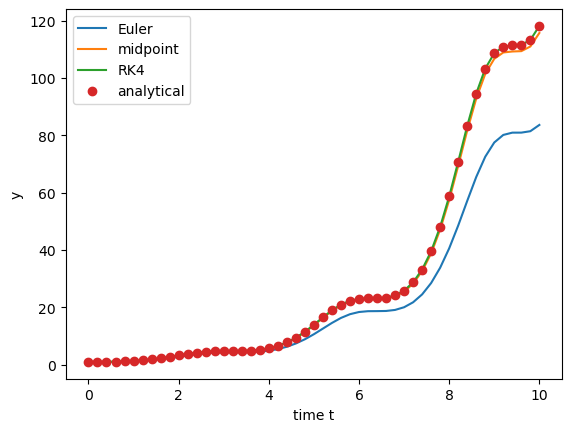

In [39]:
def fmine(t, x):
    return np.sin(t)**2 * x[0]

f=[fmine]
nmethod=3
nsteps=51
ndim=1
tstore=np.zeros(nsteps)
ystore=np.zeros([nsteps,ndim,nmethod])

tmax=10
dt=tmax/(nsteps-1)

i=0
yinit=1
# now we have two solutions
ye=[yinit] # initial value, use a list
ym=[yinit]
yk=[yinit]
t=0

while(i < nsteps):
    tstore[i]=t
    ystore[i,:,0]=ye[:]
    ystore[i,:,1]=ym[:]
    ystore[i,:,2]=yk[:]
    ye = euler(t,ye,f,ndim,dt)
    ym = midpoint(t,ym,f,ndim,dt)
    yk = rk4(t,yk,f,ndim,dt)
    t = t+dt
    i=i+1
    
yana = yinit *np.exp(1/2*(tstore-np.sin(tstore)*np.cos(tstore)))

plt.plot(tstore,ystore[:,:,0],tstore,ystore[:,:,1],tstore,ystore[:,:,2],tstore,yana,'o')
plt.legend(['Euler', 'midpoint','RK4','analytical'])
plt.ylabel('y')
plt.xlabel('time t')
#plt.ylim([0,40])
plt.show()

What do you think about the performance of the methods? Which one is best? Try different step sizes and see what you can get away with (i.e. larger step sizes which make your algorithm reach the desired final time quicker, but you also do not want the wrong answer).

# Last word
Congratulations! <br>

We learned about ordinary differential equations and have implemented three numerical algorithms to solve them! Next step will be to do something more interesting with these methods.

In the repository, there is a python file - ode.py - that contains the implementation of the three methods. ode.py and its functions will be called by other Jupyter Notebook tutorials in this course. <br> 

They may look slightly different from what you have implemented here. We hope that differnt implementations may help you understand the methods better and get familiar with Python. Definitely there is always room to improve. <br>

Feel free to make your own customized Euler, Midpoint, and 4th order Runge-Kutta functions and put them in a Python file and use them for your later numerical explorations! <br>

A tip to use functions defined in standalone python files: To use ode.py, you just need to do "import ode as odeLib" before you call any functions in it. If you have another python file named A.py that contains a function named B1. What you want to do is to put A.py in the same folder of your executing python file/Jupyter Notebook, then do "import A as any_name_you_like", and call B1 following the syntax any_name_you_like.B1 in the code cell.